## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

## Importing Dataset

In [3]:
df_ipl = pd.read_csv('iplauction2023.csv')
df_ipl.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [4]:
df_ipl.shape

(309, 7)

In [5]:
df_ipl.dtypes

name                      object
player style              object
nationality               object
base price (in lacs)     float64
final price (in lacs)    float64
franchise                 object
status                    object
dtype: object

In [6]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


## Checking Duplicates

In [7]:
df_ipl.duplicated().sum()

0

## Handling Missing Values

In [8]:
df_ipl.isnull().sum()/len(df_ipl)*100

name                      0.000000
player style              0.000000
nationality               0.000000
base price (in lacs)     51.132686
final price (in lacs)    22.977346
franchise                22.977346
status                    0.000000
dtype: float64

In [9]:
df_ipl['base price (in lacs)'] = df_ipl['base price (in lacs)'].fillna(df_ipl['base price (in lacs)'].median())
df_ipl['final price (in lacs)'] = df_ipl['final price (in lacs)'].fillna(df_ipl['final price (in lacs)'].median())

In [10]:
df_ipl['franchise'].value_counts()

RR      25
SRH     25
LSG     25
CSK     25
RCB     25
GT      25
DC      24
MI      23
PBKS    22
KKR     19
Name: franchise, dtype: int64

In [11]:
df_ipl['franchise'] = df_ipl['franchise'].replace(np.nan, 'RR')

In [12]:
df_ipl.isnull().sum()/len(df_ipl)*100

name                     0.0
player style             0.0
nationality              0.0
base price (in lacs)     0.0
final price (in lacs)    0.0
franchise                0.0
status                   0.0
dtype: float64

In [13]:
df_ipl = df_ipl.drop('name', axis= 1)
df_ipl = df_ipl.drop('franchise', axis= 1)
df_ipl = df_ipl.drop('base price (in lacs)', axis= 1)

In [14]:
df_ipl.describe(include= 'number')

,final price (in lacs)
count,309.000000
mean,317.961165
std,404.499312
min,20.000000
25%,50.000000
50%,150.000000
75%,400.000000
max,1850.000000


In [15]:
df_ipl.describe(include= 'object')

,player style,nationality,status
count,309,309,309
unique,4,14,3
top,Bowler,India,RETAINED
freq,111,201,158


## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='status', ylabel='count'>

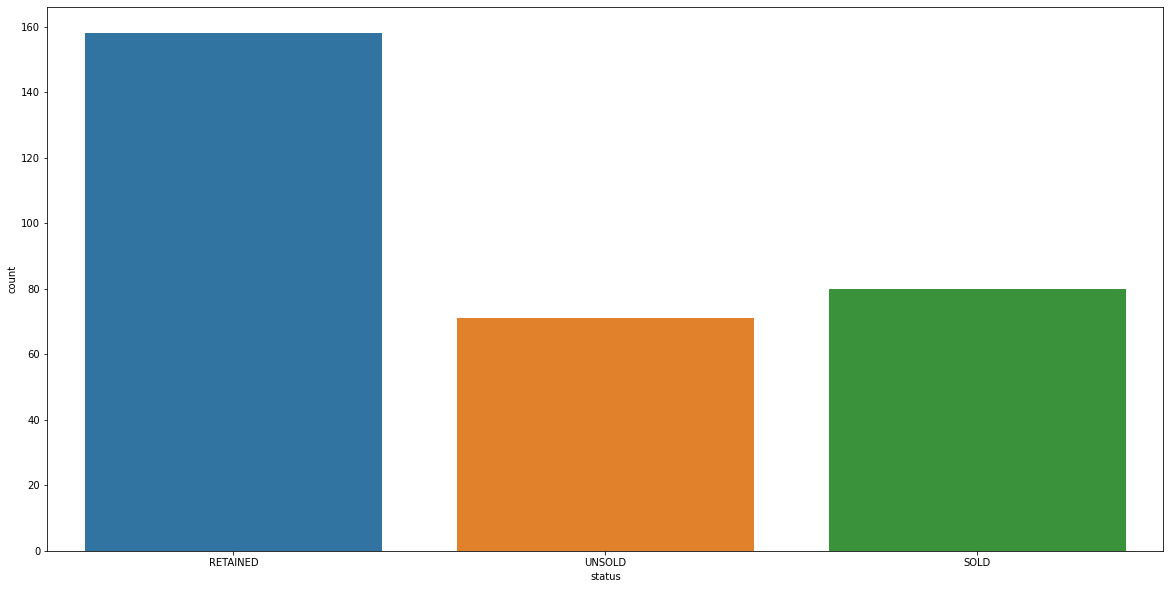

In [16]:
sns.countplot(x = 'status', data= df_ipl)

In [ ]:
# From the above plot I conclude that our target variable status is fairly balanced 

<AxesSubplot:xlabel='player style', ylabel='count'>

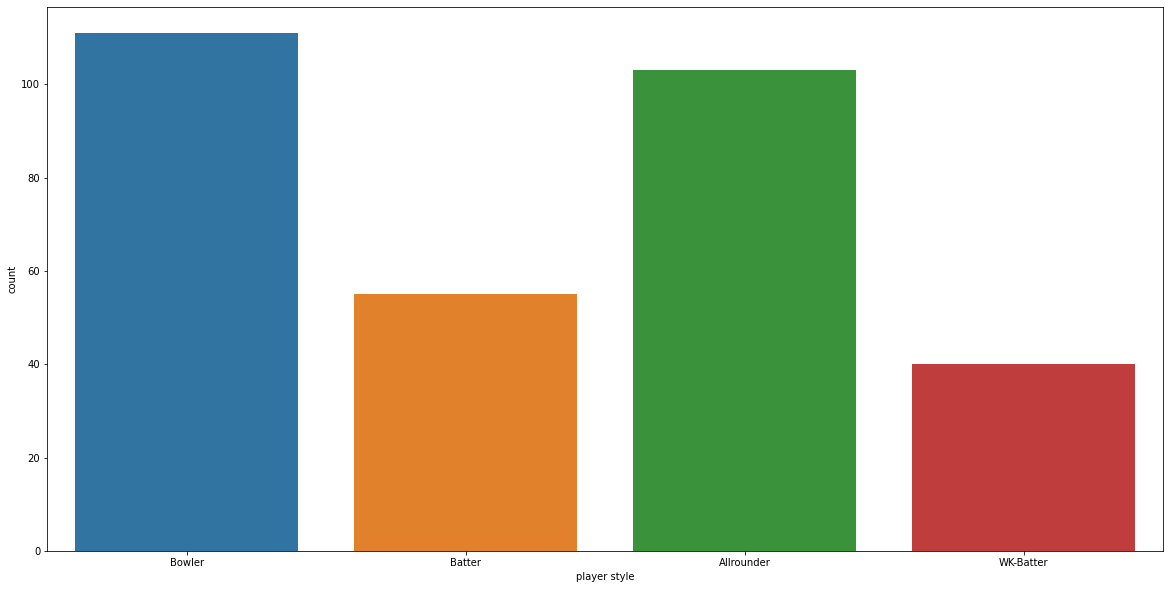

In [17]:
sns.countplot(x = 'player style', data= df_ipl)

In [ ]:
# From the above plot we can see that the player appeared in the auction were mainly bowlers compared to batsmen

<AxesSubplot:xlabel='nationality', ylabel='count'>

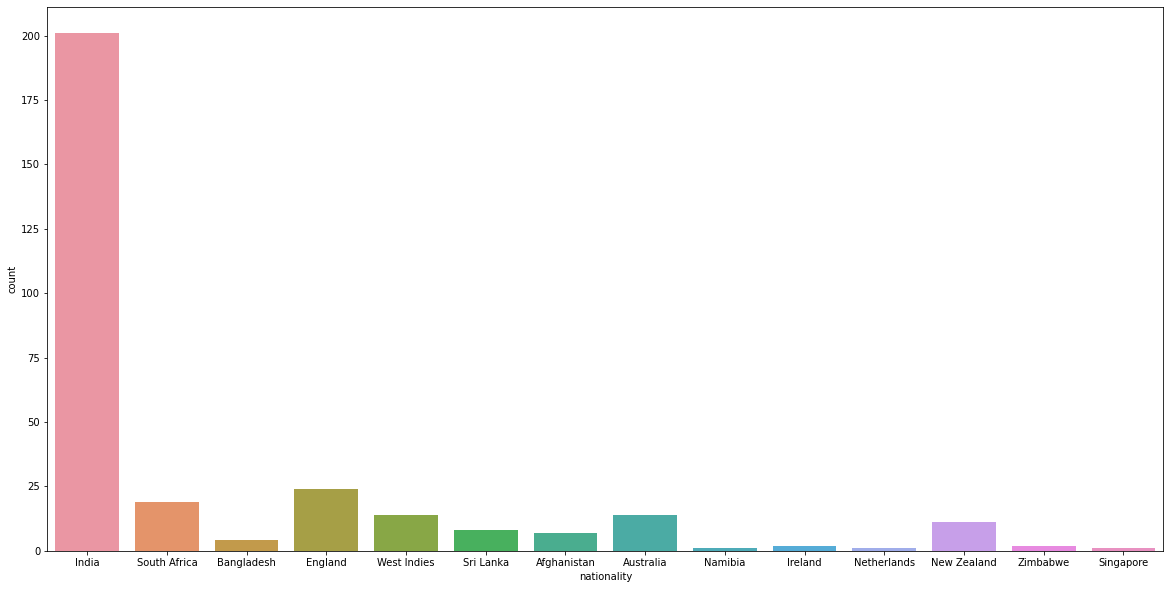

In [18]:
sns.countplot(x= 'nationality', data= df_ipl)

In [ ]:
# From the above plot we can see that most number of players in the auction are from country India

<AxesSubplot:xlabel='final price (in lacs)', ylabel='Count'>

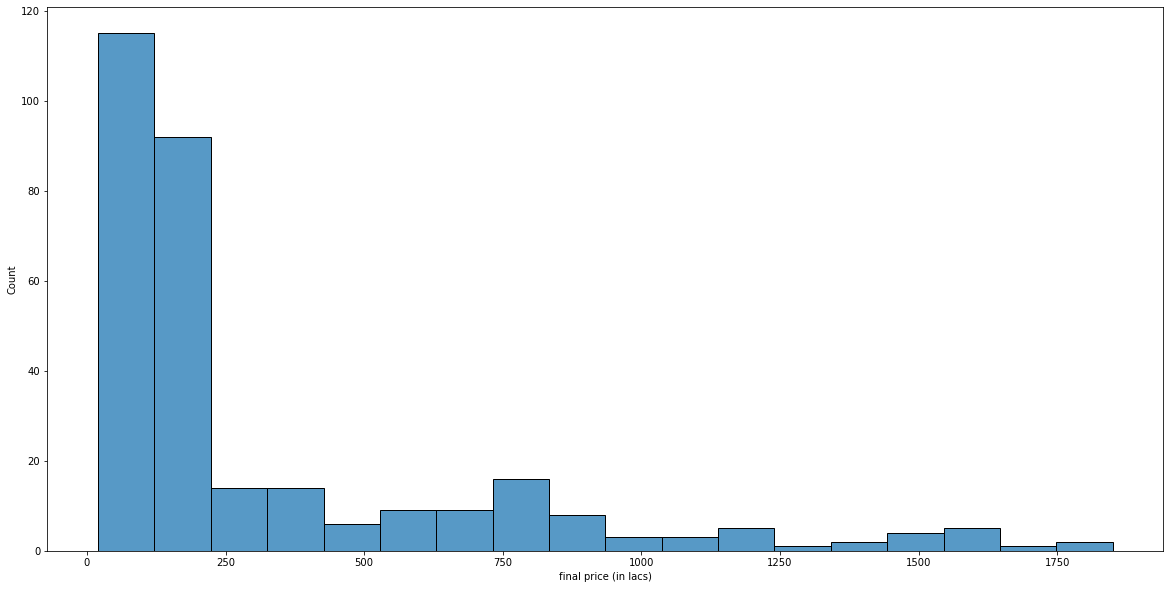

In [19]:
sns.histplot(x= 'final price (in lacs)', data= df_ipl)

### Bivariate Analysis

<AxesSubplot:xlabel='player style', ylabel='final price (in lacs)'>

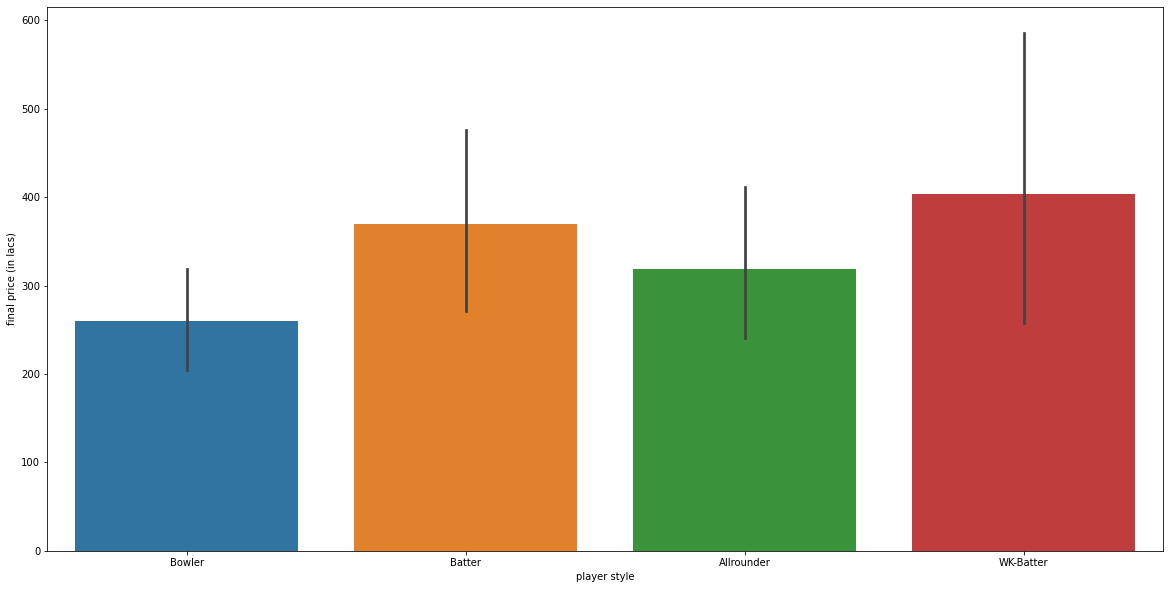

In [20]:
sns.barplot(x= 'player style', y= 'final price (in lacs)', data= df_ipl)

In [ ]:
# From this above plot we can see that the batsmen's final prices are more than bowler and allrounder

<AxesSubplot:xlabel='nationality', ylabel='final price (in lacs)'>

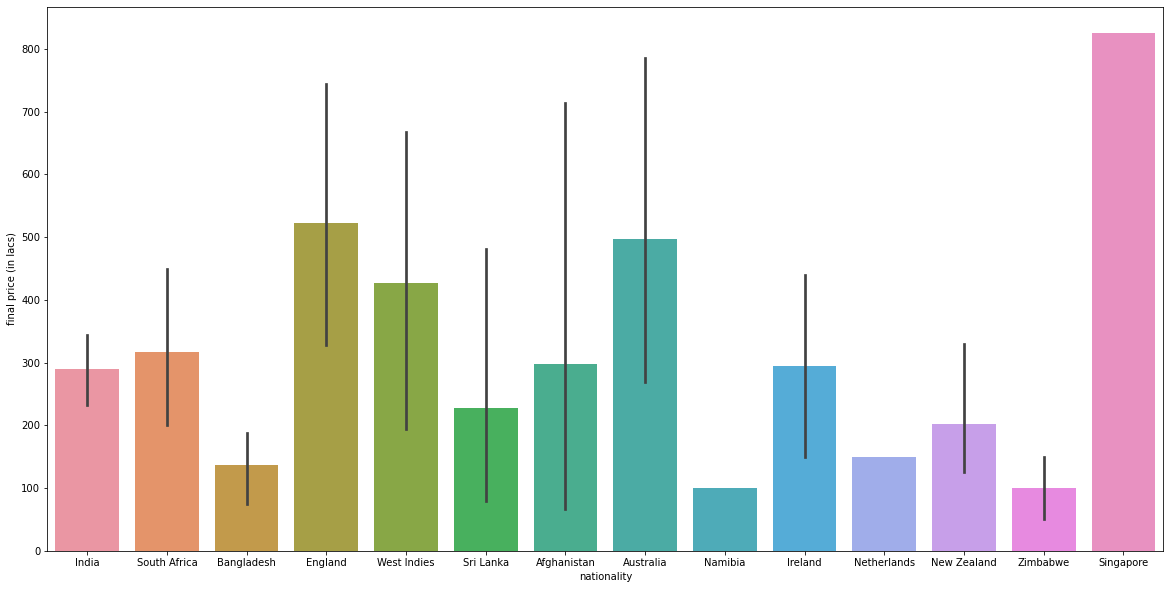

In [21]:
sns.barplot(x= 'nationality', y= 'final price (in lacs)', data= df_ipl)

In [ ]:
# From the above plot we can see that the player from singapore has more final prices than players from other nationality

In [22]:
tab = pd.crosstab(index= df_ipl['player style'], columns= df_ipl['status']).apply(lambda r:r/(r.sum()), axis= 1)
tab

status,RETAINED,SOLD,UNSOLD
player style,,,
Allrounder,0.436893,0.310680,0.252427
Batter,0.581818,0.218182,0.200000
Bowler,0.558559,0.225225,0.216216
WK-Batter,0.475000,0.275000,0.250000


<AxesSubplot:xlabel='player style'>

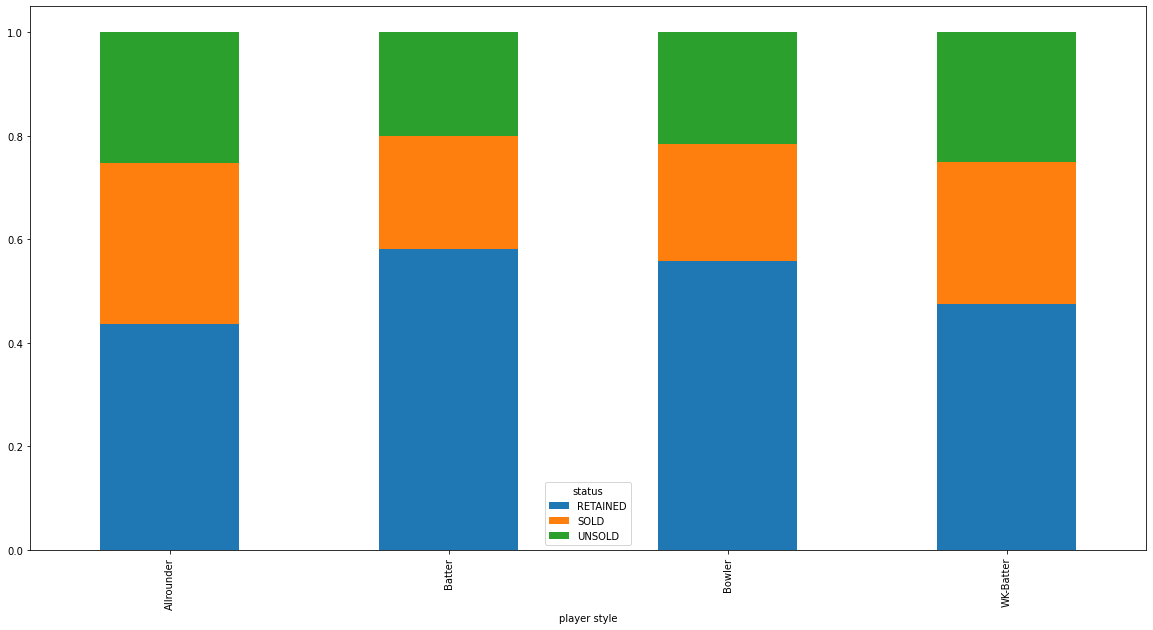

In [23]:
tab.plot.bar(stacked= True)

In [ ]:
# From the above plot we can see that batsmen's are retained the most by any franchise and on the other hand franchise have 
# purchase more allrounder. We can also see that franchise don't prefer WK-batsmen as there are maximum WK-batsmen which are unsold

In [24]:
tab = pd.crosstab(index= df_ipl['nationality'], columns= df_ipl['status']).apply(lambda r:r/(r.sum()), axis= 1)
tab

status,RETAINED,SOLD,UNSOLD
nationality,,,
Afghanistan,0.428571,0.142857,0.428571
Australia,0.500000,0.285714,0.214286
Bangladesh,0.250000,0.500000,0.250000
England,0.291667,0.333333,0.375000
India,0.552239,0.253731,0.194030
Ireland,0.000000,0.500000,0.500000
Namibia,0.000000,1.000000,0.000000
Netherlands,0.000000,0.000000,1.000000
New Zealand,0.545455,0.181818,0.272727


<AxesSubplot:xlabel='nationality'>

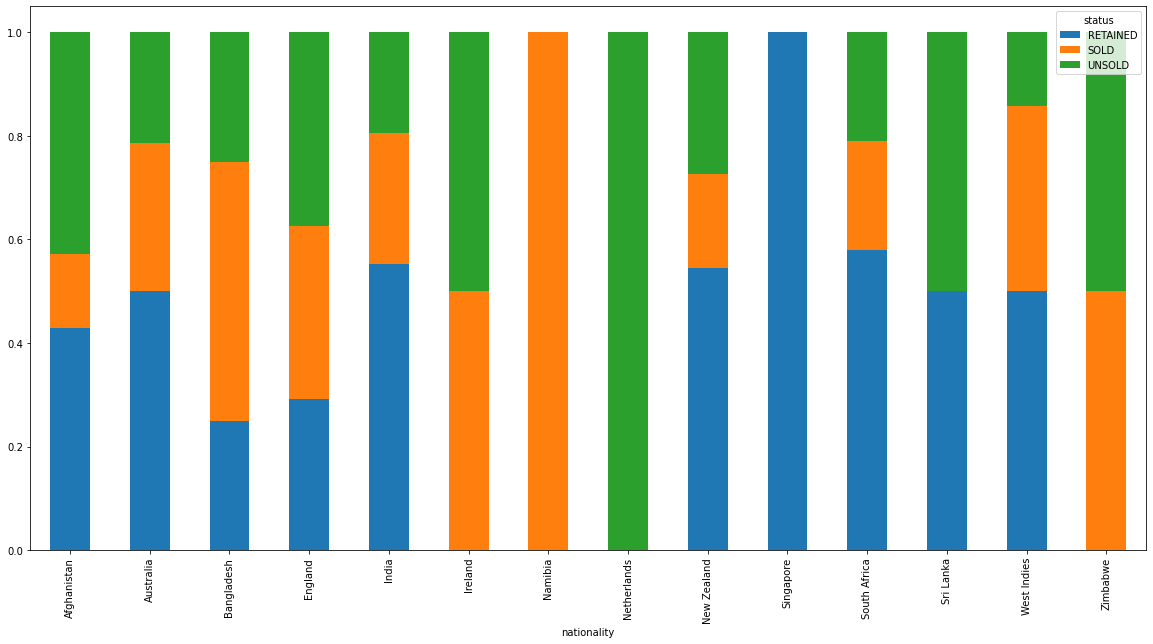

In [25]:
tab.plot.bar(stacked= True)

## Encoding the Categorical Variable

In [26]:
df_ipl['status'] = df_ipl['status'].replace('RETAINED',0)
df_ipl['status'] = df_ipl['status'].replace('SOLD',1)
df_ipl['status'] = df_ipl['status'].replace('UNSOLD',2)

In [27]:
df_ipl['status'].astype(int)

0      0
1      2
2      2
3      1
4      1
      ..
304    0
305    0
306    0
307    0
308    0
Name: status, Length: 309, dtype: int32

In [28]:
df_ipl.dtypes

player style              object
nationality               object
final price (in lacs)    float64
status                     int64
dtype: object

In [29]:
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder()

df_encode = pd.DataFrame(encode.fit_transform(df_ipl[['player style']]).toarray(), columns= ['Bowler', 'Batter', 'Allrounder', 'WK-Batter'])

df_encode = pd.concat([df_ipl, df_encode], axis= 1)

df_encode.head(2)

,player style,nationality,final price (in lacs),status,Bowler,Batter,Allrounder,WK-Batter
0,Bowler,India,20.0,0,0.0,0.0,1.0,0.0
1,Batter,India,150.0,2,0.0,1.0,0.0,0.0


In [30]:
def freq_encod(col):    
    dic = df_encode[col].value_counts().to_dict()

    dic = {i:round(j/(len(df_encode)),5) for i,j in dic.items()}

    df_encode[col] = df_encode[col].map(dic)

In [31]:
freq_encod('nationality')

## Scaling the Dataset

In [32]:
df_target = df_encode['status']

df_feature = df_encode.drop('status', axis= 1)

In [33]:
df_num = df_feature.select_dtypes(include= 'number')
df_num.columns

Index(['nationality', 'final price (in lacs)', 'Bowler', 'Batter',
       'Allrounder', 'WK-Batter'],
      dtype='object')

In [34]:
df_cat = df_feature.select_dtypes(include= 'object')
df_cat.columns

Index(['player style'], dtype='object')

In [35]:
dummy_var = pd.get_dummies(data= df_cat, drop_first= True)
dummy_var.head()

,player style_Batter,player style_Bowler,player style_WK-Batter
0,0,1,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,0,0


In [36]:
ss = StandardScaler()

num_scaled = ss.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns= df_num.columns)

In [37]:
X = pd.concat([df_num_scaled,dummy_var], axis= 1)
X.head()

,nationality,final price (in lacs),Bowler,Batter,Allrounder,WK-Batter,player style_Batter,player style_Bowler,player style_WK-Batter
0,0.732261,-0.737812,-0.707107,-0.465334,1.335584,-0.385615,0,1,0
1,0.732261,-0.415906,-0.707107,2.148996,-0.748736,-0.385615,1,0,0
2,-1.314705,-0.415906,1.414214,-0.465334,-0.748736,-0.385615,0,0,0
3,-1.483432,-0.415906,1.414214,-0.465334,-0.748736,-0.385615,0,0,0
4,-1.258474,-0.539716,-0.707107,2.148996,-0.748736,-0.385615,1,0,0


In [38]:
xc = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(xc, df_target, test_size= 0.2, random_state= 10)

print(X_train.shape)

(247, 10)


In [39]:
print(X_test.shape)

(62, 10)


In [40]:
print(y_train.shape)

(247,)


In [41]:
print(y_test.shape)

(62,)


## Building a Base Model

### 1. Logistics Regression

In [42]:
model = LogisticRegression(multi_class= 'ovr', solver= 'liblinear')

lm = model.fit(X_train, y_train)

In [43]:
y_pred = lm.predict(X_test)

In [44]:
lm_ar = metrics.accuracy_score(y_test, y_pred)
lm_ar

0.5

In [45]:
from sklearn.metrics import classification_report

report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.85      0.67        33
           1       0.20      0.07      0.10        15
           2       0.29      0.14      0.19        14

    accuracy                           0.50        62
   macro avg       0.35      0.35      0.32        62
weighted avg       0.41      0.50      0.43        62



## Fine Tuning the Model

### 2. Decision Tree(Using Entropy)

In [46]:
decision_tree = DecisionTreeClassifier(criterion= 'entropy', random_state= 10)
decision_tree = decision_tree.fit(X_train, y_train)

In [47]:
pred = decision_tree.predict(X_test)

In [48]:
dt = metrics.accuracy_score(y_test, pred)
dt

0.8064516129032258

In [49]:
reports = classification_report(y_test, pred)
print(reports)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.62      0.53      0.57        15
           2       1.00      0.93      0.96        14

    accuracy                           0.81        62
   macro avg       0.81      0.78      0.79        62
weighted avg       0.80      0.81      0.80        62



### 3. Decision Tree(Using Gini)

In [50]:
dt_model = DecisionTreeClassifier(criterion= 'gini',
                                  max_depth= 5,
                                  min_samples_split= 4,
                                  max_leaf_nodes= 6,
                                  random_state= 10)

dt_model = dt_model.fit(X_train, y_train)

In [51]:
predd = dt_model.predict(X_test)

In [52]:
dt_model_ar = metrics.accuracy_score(y_test, predd)
dt_model_ar

0.7580645161290323

In [53]:
reports = classification_report(y_test, predd)
print(reports)

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15
           2       1.00      1.00      1.00        14

    accuracy                           0.76        62
   macro avg       0.56      0.67      0.60        62
weighted avg       0.59      0.76      0.66        62



C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Decision Tree(Using GridSearch)

In [54]:
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2,10),
                    'max_features':['sqrt','log2']}]

decision_tree_classificaton = DecisionTreeClassifier(random_state= 10)

tree_grid = GridSearchCV(estimator= decision_tree_classificaton,
                         param_grid= tuned_parameters,
                         cv= 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

In [55]:
dtt_model = DecisionTreeClassifier(criterion= tree_grid_model.best_params_.get('criterion'),
                                   max_depth= tree_grid_model.best_params_.get('max_depth'),
                                   max_features = tree_grid_model.best_params_.get('max_features'),
                                   random_state = 10)

dtt_model = dtt_model.fit(X_train, y_train)
dtt_model

DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=10)

In [56]:
p = dtt_model.predict(X_test)

In [57]:
dtt_model_ar = metrics.accuracy_score(y_test, p)
dtt_model_ar

0.7258064516129032

In [58]:
reports = classification_report(y_test, p)
print(reports)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        33
           1       0.47      0.47      0.47        15
           2       1.00      0.86      0.92        14

    accuracy                           0.73        62
   macro avg       0.74      0.70      0.72        62
weighted avg       0.73      0.73      0.73        62



### 5. Random Forest Classification

In [59]:
rf = RandomForestClassifier(n_estimators= 10, random_state= 10)

rf_model = rf.fit(X_train, y_train)

In [60]:
pr = rf_model.predict(X_test)

In [61]:
rf_model_ar = metrics.accuracy_score(y_test, pr)
rf_model_ar

0.7419354838709677

In [62]:
reports = classification_report(y_test, pr)
print(reports)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.50      0.47      0.48        15
           2       1.00      0.86      0.92        14

    accuracy                           0.74        62
   macro avg       0.75      0.71      0.73        62
weighted avg       0.75      0.74      0.74        62



### 6. Random Forest Classification(Using GridSearch)

In [63]:
tuned_parameters = [{'criterion':['entropy','gini'],
                     'n_estimators':[10,30,50,70,90],
                     'max_depth':[10,15,20],
                     'max_features':['sqrt','log2'],
                     'min_samples_split':[2,5,8,11],
                     'min_samples_leaf':[1,5,9],
                     'max_leaf_nodes':[2,5,8,11]}]

random_forest_classification = RandomForestClassifier(random_state=10)

rf_grid = GridSearchCV(estimator = random_forest_classification,
                         param_grid=tuned_parameters,
                         cv=5)

rf_grid_model = rf_grid.fit(X_train,y_train)

print(rf_grid_model.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [64]:
pr = rf_grid_model.predict(X_test)

In [65]:
rf_grid_model_ar = metrics.accuracy_score(y_test, pr)
rf_grid_model_ar

0.8064516129032258

In [66]:
reports = classification_report(y_test, pr)
print(reports)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.64      0.47      0.54        15
           2       1.00      1.00      1.00        14

    accuracy                           0.81        62
   macro avg       0.81      0.78      0.79        62
weighted avg       0.80      0.81      0.80        62



### 7. XGBoost Classifier

In [67]:
xg = XGBClassifier(learning_rate= 0.1, gamma= 3)

xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [68]:
y_p = xg.predict(X_test)

In [69]:
xg_ar = metrics.accuracy_score(y_test, y_p)
xg_ar

0.7580645161290323

In [70]:
reports = classification_report(y_test, y_p)
print(reports)

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15
           2       1.00      1.00      1.00        14

    accuracy                           0.76        62
   macro avg       0.56      0.67      0.60        62
weighted avg       0.59      0.76      0.66        62



C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 8. XGBoost Classifier(Using GridSearch)

In [71]:
tuning_parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                     'max_depth':range(3,10),
                     'gamma':[0,1,2,3,4]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator= xgb_model, param_grid= tuning_parameters, cv= 3, scoring= 'accuracy')

xgb_grid.fit(X_train, y_train)

print('Best Parameters for XGBoost Classifier: ', xgb_grid.best_params_, '\n')

Best Parameters for XGBoost Classifier:  {'gamma': 1, 'learning_rate': 0.2, 'max_depth': 7} 



In [72]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                               gamma = xgb_grid.best_params_.get('gamma'))

xgb_mod = xgb_grid_model.fit(X_train, y_train)

In [73]:
pr = xgb_mod.predict(X_test)

In [74]:
xgb_mod_ar = metrics.accuracy_score(y_test, pr)
xgb_mod_ar

0.7419354838709677

In [75]:
reports = classification_report(y_test, pr)
print(reports)

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.44      0.27      0.33        15
           2       1.00      1.00      1.00        14

    accuracy                           0.74        62
   macro avg       0.72      0.71      0.70        62
weighted avg       0.72      0.74      0.72        62



## Comparing The Model

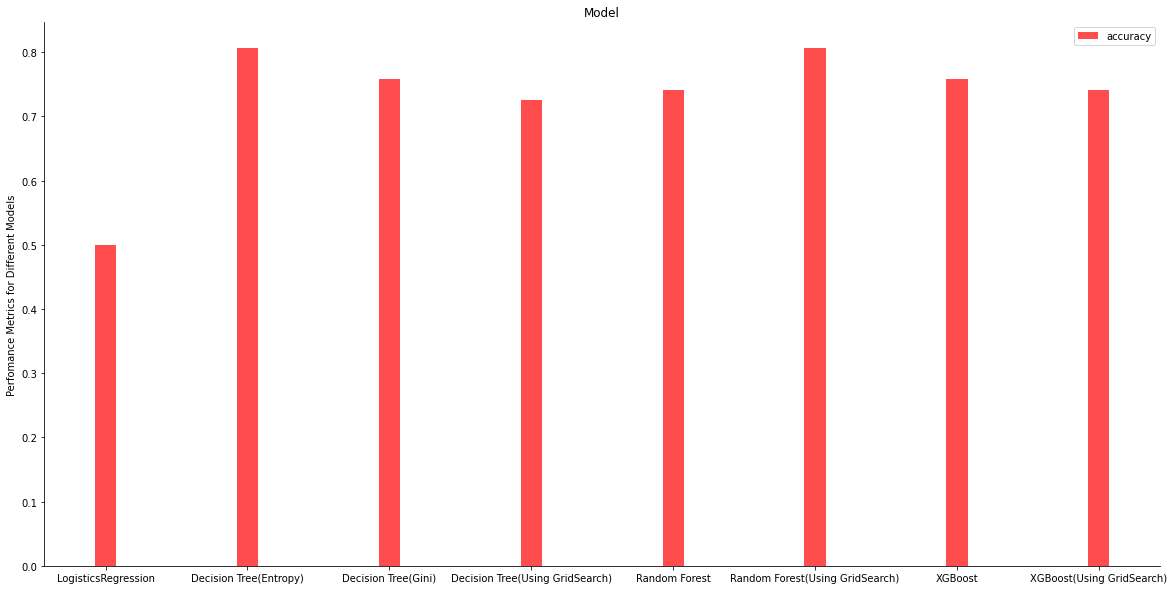

In [76]:
ax = plt.subplot(111)

models = ['LogisticsRegression', 'Decision Tree(Entropy)','Decision Tree(Gini)','Decision Tree(Using GridSearch)', 'Random Forest','Random Forest(Using GridSearch)', 'XGBoost', 'XGBoost(Using GridSearch)']

values = [lm_ar,dt,dt_model_ar, dtt_model_ar,rf_model_ar, rf_grid_model_ar,xg_ar, xgb_mod_ar]

model = np.arange(len(models))

plt.bar(model, values, align= 'center', width= 0.15, alpha= 0.7, color= 'red', label= 'accuracy')
plt.xticks(model, models)

plt.ylabel('Perfomance Metrics for Different Models')
plt.title('Model')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [ ]:
# After comparing the models with their accuracy score in the above plot we can see that Random Forest(Using GridSearch) has
# the best accuracy score compare to other models

## Plotting the Important Features

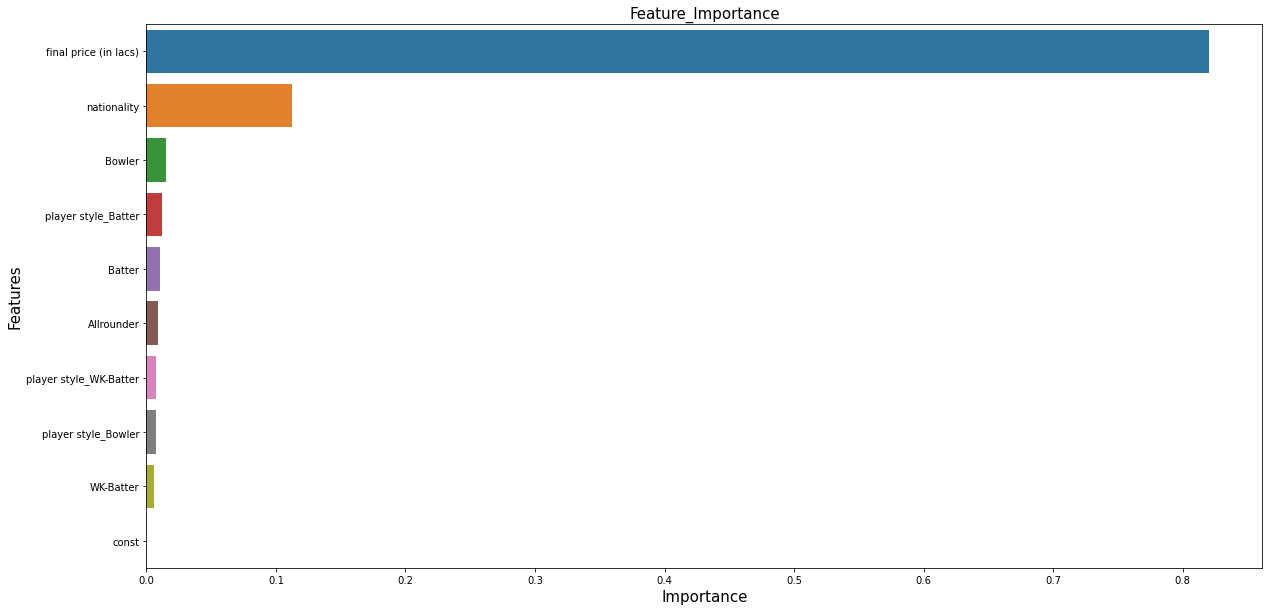

In [77]:
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': rf_grid_model.best_estimator_.feature_importances_})

important_features = important_features.sort_values('Importance', ascending= False)

sns.barplot(x='Importance',y='Features',data=important_features)

plt.title('Feature_Importance',fontsize=15)
plt.xlabel('Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)

plt.show()

In [ ]:
# From the above plot we can see that the feature affecting the most is the final price of the players after they get sold

### 1. Final Price (in lacs)

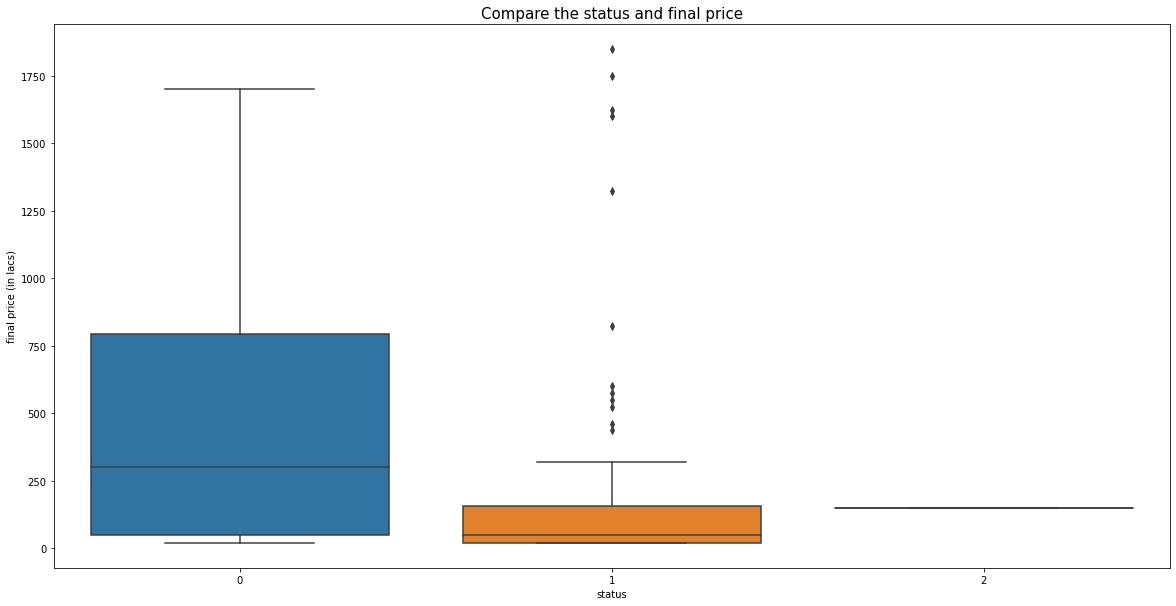

In [78]:
sns.boxplot(x= 'status', y= 'final price (in lacs)', data= df_ipl)

plt.title('Compare the status and final price', fontsize= 15)

plt.show()

After the auction the retained players which is (0) has the highest final price